# Understanding Space ant Time Complexity by exploring common Algorithms

- Recap what is space/time complexities?
- Types of notations used to measure complexities.
- Differences between common time complexities.
- Analysis(complexities) of simple algorithms.
- Compare & Contrast different algorithms based on their complexities.

## Recap

What is `time` complexity? = **The number of steps taken by the algorithm in relation to the size of the input.**

`space` complexity = **The amount of memory used in relation to the size of the input .**

Both are commonly measured using *Big O* metric.

**Big O** => Worst case scenario.



## Measures of Complexity

1. Big 0 => Worst case scenario (upper bound)
2. Big Theta => average case (tight bound)
3. Big Omega => Best case scenario (lower bound)

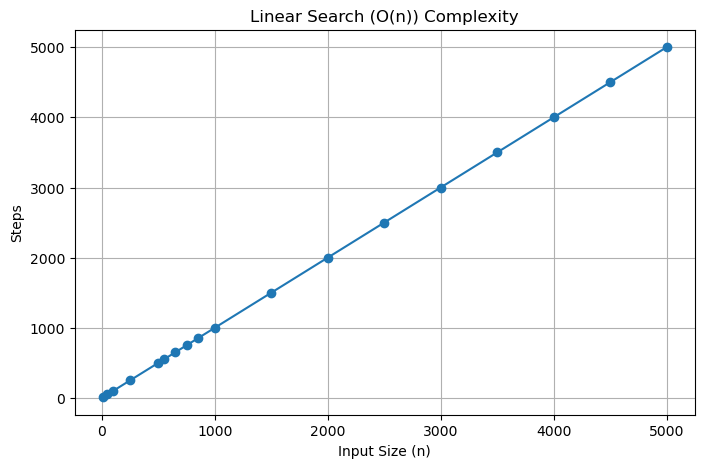

In [29]:
import matplotlib.pyplot as plt

input_size = [10, 50, 100, 250, 500, 550, 650, 750, 850, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]

def test_n_plot(algorithm_func, title, data_generator=None, target=None):
    output = []

    for n in input_size:
        # Generate data using custom generator or default
        data = data_generator(n) if data_generator else list(range(n))

        # Pass parameters based on whether the algorithm expects a target
        if target is not None:
            steps = algorithm_func(target, data)
        else:
            steps = algorithm_func(data)

        output.append(steps)

    # Plot the results
    plt.figure(figsize=(8, 5))
    plt.plot(input_size, output, marker='o')
    plt.title(f"{title} Complexity")
    plt.xlabel("Input Size (n)")
    plt.ylabel("Steps")
    plt.grid(True)
    plt.show()


# Sample linear search implementation counting steps
def linear_search(target, arr):
    steps = 0
    for i in range(len(arr)):
        steps += 1
        if arr[i] == target:
            return steps
    return steps  # Worst-case steps (target not found)

# Run test
test_n_plot(
    algorithm_func=linear_search,
    title="Linear Search (O(n))",
    target=-1  # Not found → worst case
)


## Common Complexity Types

1. Linear `0(n)` - As input grows number of steps increases increases uniformly.
2. Quadratic `0(n**2)` - Running time grows proportionally to the square of the input.
3. Constant `0(1)` - Regardless of size of input, numbers steps do not change.
4. Exponential Time `0(2**n)` - Running time growing exponentially
5. Logarithmic Time `0(logn)` - Running time grows very slowly as input size increases.
6. Linear Logarithmic Time `0(n log n)` - Like 5 but with a constant.
7. Factorial `0(n!)` - Time grows rapidly as input grows

![image](https://miro.medium.com/v2/resize:fit:1400/1*dWet_YU-5072Kcko7LzsuQ.jpeg)

## Common Algorithms (Search / Sort)

Here are some common algorithms that we will look at:

1. Linear Search  (*Brute Force Search*) `{ 0(n) }`  =>  Sequentially going through each item until target value is found
2. Binary Search `{ 0(log n) }` => Finding an element in a `sorted` list by **repeatedly** dividing the search interval by 2
3. Bubble Sort `{ 0 n**2 }` => Sort that involves repeated steps of going through elements and checking adjacent elements and swap them if they are in the wrong order.

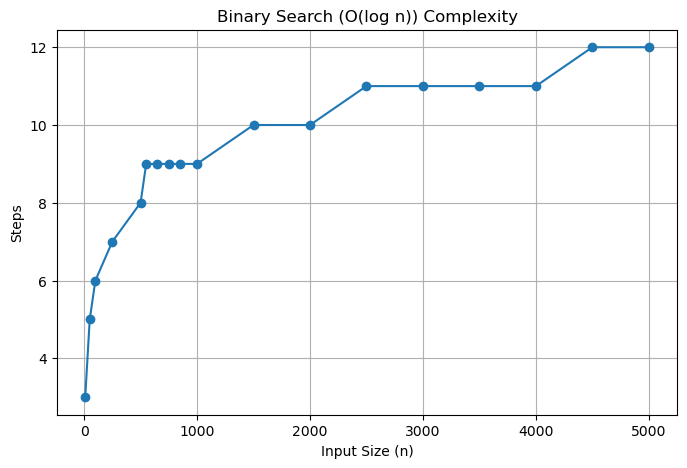

In [30]:
def binary_search(num, numArr):
    steps = 0
    low = 0
    high = len(numArr) - 1

    while low <= high:
        steps += 1     
        mid = (low + high) // 2
        mid_value = numArr[mid]
        if mid_value == num:
            return steps
        elif mid_value < num:
            low = mid + 1
        else:
            high = mid - 1

    return steps  # Return total steps even if not found (worst-case)

test_n_plot(
    algorithm_func=binary_search,
    title="Binary Search (O(log n))",
    target=-1  # Not found → worst case
)

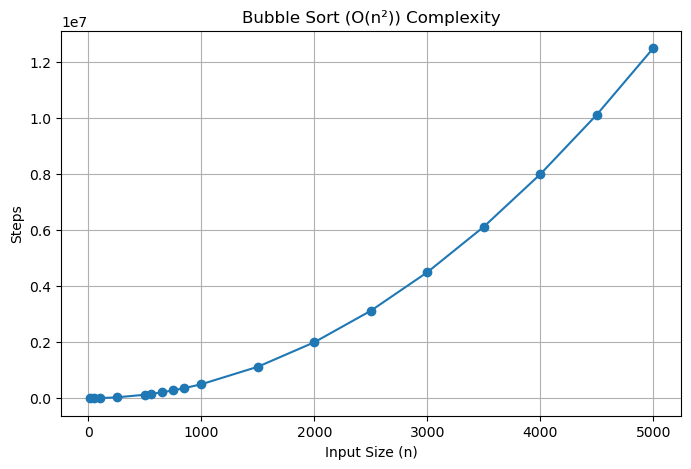

In [31]:
# Bubble Sort
def bubble_sort(arr):
    n = len(arr)
    steps = 0
    arr = arr.copy()  # To avoid in-place mutation across runs

    for i in range(n):
        for j in range(0, n - i - 1):
            steps += 1
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
            # print(f"i = {i}, j = {j}, array = {arr}")
    return steps  # Return the number of comparison steps

test_n_plot(algorithm_func=bubble_sort, title="Bubble Sort (O(n²))")

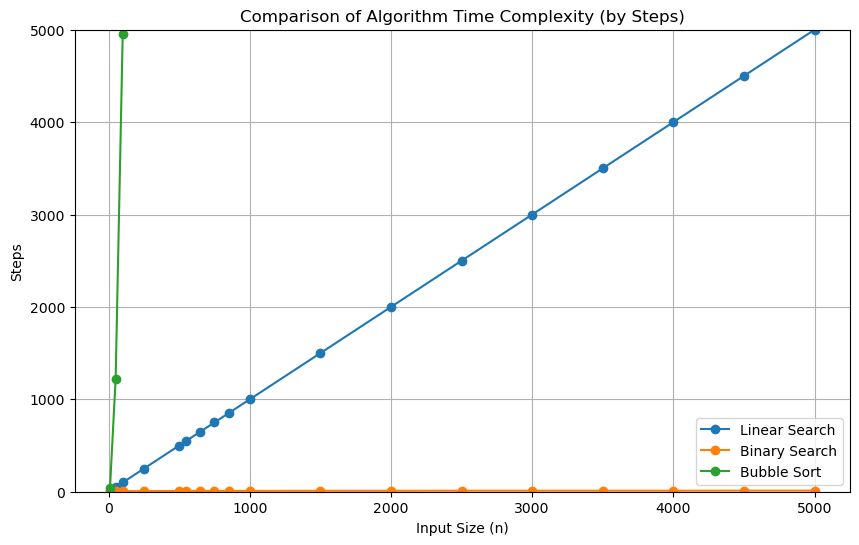

In [39]:
def compare_algorithms_plot(algorithms):
    plt.figure(figsize=(10, 6))

    for name, func, needs_target, data_generator in algorithms:
        steps_list = []
        for n in input_size:
            data = data_generator(n) if data_generator else list(range(n))
            if needs_target:
                steps = func(-1, data)  # worst case search (target not found)
            else:
                steps = func(data)
            steps_list.append(steps)
        plt.plot(input_size, steps_list, marker='o', label=name)

    plt.title("Comparison of Algorithm Time Complexity (by Steps)")
    plt.xlabel("Input Size (n)")
    plt.ylabel("Steps")
    plt.legend()
    plt.grid(True)
    plt.ylim(0, 5000)
    plt.show()

compare_algorithms_plot([
    ("Linear Search", linear_search, True, None),
    ("Binary Search", binary_search, True, None),
    ("Bubble Sort", bubble_sort, False, lambda n: list(range(n, 0, -1)))  # worst case
])